<a href="https://colab.research.google.com/github/skent259/crapssim/blob/master/crapssim_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the crapssim sandbox!

This is a quick attempt to allow people to run the crapssim Python package without requiring a detailed python installation.  Some sample code is set up to get you started on running craps simulations quickly. 

## Setup 

In [59]:
!pip install crapssim 
import crapssim as craps 
from crapssim.strategy import * 

import numpy as np  
import pandas as pd
from plotnine import *

## Pick your favorite strategy 

Either select from the list of available strategies, or write your own.  The file [strategy.py](https://github.com/skent259/crapssim/blob/master/crapssim/strategy.py) has examples of defining strategies from scratch, and utilizing other functions to make complex strategies quickly.  

In [30]:
#@title  { run: "auto", display-mode: "form" }
mode = "pick strategy" #@param ["pick strategy", "write strategy"]

if mode == 'pick strategy':

  from inspect import getmembers, isfunction
  strat_options = [f[0] for f in getmembers(craps.strategy) if isfunction(f[1])]

  print("Strategy options:")
  for strat in strat_options:
    print(f"- {strat}")

  strategy = passline #@param ["passline", "dontpass", "place68", "ironcross", "risk12", "hammerlock", "dicedoctor", "risk12", "passline_odds345"] {type:"raw", allow-input: true}
elif mode == 'write strategy':
  
  print("Write your strategy in code above (click 'show code'):")
  ##-----------------------------------------------------------------#
  # WRITE YOUR STRATEGY HERE
  # The iron cross is shown below, replace with your own logic
  #
  def custom_strategy(player, table, unit=5, strat_info=None): 
    passline(player, table, unit)
    passline_odds(player, table, unit, strat_info=None, mult=2)
    place(player, table, 2 * unit, strat_info={"numbers": {5, 6, 8}})

    if table.point == "On":
        if not player.has_bet("Field"):
            player.bet(
                Field(
                    unit,
                    double=table.payouts["fielddouble"],
                    triple=table.payouts["fieldtriple"],
                )
            )
  #
  ##-----------------------------------------------------------------#

  strategy = custom_strategy



Strategy options:
- dicedoctor
- dontpass
- hammerlock
- ironcross
- knockout
- layodds
- pass2come
- passline
- passline_odds
- passline_odds2
- passline_odds345
- place
- place68
- place68_2come
- place68_cpr
- risk12


## Test your strategy

Make sure everything is working right, especially if you write a custom strategy. (This is usually the time consuming process for me.)  You can adjust the number of rolls and bankroll accordingly.  

In [31]:
# Adjust bankroll or rolls here
bankroll = 200
max_rolls = 20 

table = craps.Table()
you = craps.Player(bankroll=bankroll, bet_strategy=strategy)
table.add_player(you)
table.run(max_rolls=max_rolls)

Welcome to the Craps Table!
Initial players: ['Player']
Player's current bets: ['PassLine, $5.0']

Dice out!
Shooter rolled 6 [2 4]
Point is On (6)
Total Player Cash is $200.0
Player's current bets: ['PassLine, $5.0']

Dice out!
Shooter rolled 5 [1 4]
Point is On (6)
Total Player Cash is $200.0
Player's current bets: ['PassLine, $5.0']

Dice out!
Shooter rolled 10 [6 4]
Point is On (6)
Total Player Cash is $200.0
Player's current bets: ['PassLine, $5.0']

Dice out!
Shooter rolled 11 [5 6]
Point is On (6)
Total Player Cash is $200.0
Player's current bets: ['PassLine, $5.0']
Player lost $5.0 on PassLine bet.

Dice out!
Shooter rolled 7 [6 1]
Point is Off (None)
Total Player Cash is $195.0
Player's current bets: ['PassLine, $5.0']

Dice out!
Shooter rolled 6 [1 5]
Point is On (6)
Total Player Cash is $195.0
Player's current bets: ['PassLine, $5.0']
Player won $5.0 on PassLine bet!

Dice out!
Shooter rolled 6 [2 4]
Point is Off (None)
Total Player Cash is $200.0
Player's current bets: ['Pa

## Simulate many sessions

Use this code to simulate your chosen strategy many times and get a sense for what you might expect at the craps table.  For a reliable outcome, I recommend at least 100,000 simulations (which will take a few minutes)

In [122]:
#@title Simulation parameters
n_sim = 10000 #@param {type:"integer"}
bankroll = 1000 #@param {type:"number"}
max_rolls =  144#@param {type:"raw"}
max_shooter =  float("inf")#@param {type:"raw"}

print_every = 1000 #@param {type:"integer"}


In [123]:
results = []

print("[sim, final, initial, n_rolls]")
for i in range(n_sim):
  table = craps.Table() 
  table.add_player(craps.Player(bankroll, strategy, 1))
  table.run(max_rolls, max_shooter, verbose=False)

  row = [i, table._get_player(1).bankroll, bankroll, table.dice.n_rolls]
  if (i % print_every == 0):
    print(row)
  results.append(row)

# Create dataframe of results
results = pd.DataFrame(results, columns = ['sim', 'final', 'initial', 'n_rolls'])
results['winnings'] = results['final'] - results['initial']

[sim, final, initial, n_rolls]
[0, 1040.0, 1000, 144]
[1000, 1000.0, 1000, 144]
[2000, 1055.0, 1000, 144]
[3000, 1015.0, 1000, 144]
[4000, 980.0, 1000, 144]
[5000, 965.0, 1000, 144]
[6000, 945.0, 1000, 144]
[7000, 1010.0, 1000, 144]
[8000, 975.0, 1000, 144]
[9000, 985.0, 1000, 144]


### Visualize results

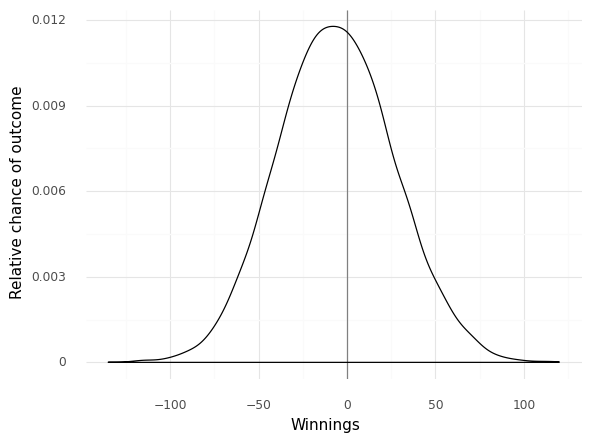

<ggplot: (8778397142509)>

In [124]:
# Density plot
(ggplot(results, aes(x='winnings')) + 
 geom_vline(xintercept = 0, color = 'grey') + 
 geom_density() +
 theme_minimal() + 
 labs(x = "Winnings", y = "Relative chance of outcome")
)

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


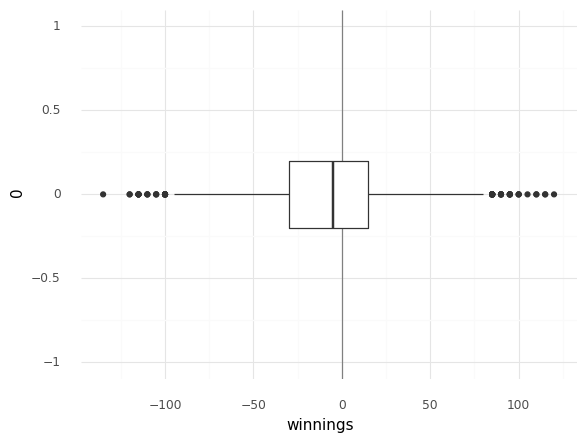

<ggplot: (8778397004857)>

In [125]:
# Boxplot
(ggplot(results,aes(y='winnings',x=0)) + 
 geom_hline(yintercept = 0, color = 'grey') + 
 geom_boxplot(width = 0.4) +
 xlim(-1, 1) + 
 coord_flip() +
 theme_minimal()
)

Outline for my sanity

- ~~Setup~~ 
- Pick a strategy
  - ~~List of supported strats~~
  - ~~Link to code where you can see examples~~
  - ~~Option to select the strategy or write your own~~
  - ?Multiple strategies?
- Strategy test run
  - ~~Random rolls~~ 
  - Option of the fixed rolls, does a regular printout to check
- Simulation that will finish in a reasonable amount of time 
  - ~~Option of the number of sims~~
  - Output: table, graph?

- Advanced tips and tricks?
- Option for them to sent the strategy to me for inclusion
  - Email? 
  - Github issue?